In [74]:
import numpy as np
import pandas as pd
import itertools
import os

In [75]:
FILE_DIR = "testResultSmall"
nExperimentReptition = 10
randomSeed = 20220222
trueValue = 0.005
dataDistributions = ['gamma', 'lognorm', 'pareto']
dataSizes = [500, 800]

### Tail probability estimation with single threshold

In [76]:
metaDataDict = {"dataSize": 500,
                "percentageLHS": 0.99,
                "percentageRHS": 0.995,
                "thresholdPercentage": 0.7,
                "alpha": 0.05,
                "gEllipsoidalDimension": 3}

In [77]:
thresholdPercentages = np.linspace(0.6, 0.85, 11).tolist()
# served as the lhsEndpoint in the objective function: 1_{lhs<=x<=rhs}.
percentageLHSs = np.linspace(0.9, 0.99, 10).tolist()
columnNames = ['dataDistribution','dataSize','percentageLHS', 'percentageRHS', "thresholdPercentage", "trueValue", "nrepIndex", "(0,KS)","(1,KS)","(2,KS)","(0,CHI2)","(1,CHI2)","(2,CHI2)"]
cumDf1 = pd.DataFrame(columns=columnNames)
for dataDistribution, dataSize, percentageLHS, thresholdPercentage in itertools.product(*[dataDistributions, dataSizes, percentageLHSs, thresholdPercentages]):
    metaDataDict["dataSize"] = dataSize
    metaDataDict["percentageLHS"] = percentageLHS
    metaDataDict["percentageRHS"] = percentageLHS+trueValue
    metaDataDict["thresholdPercentage"] = thresholdPercentage
    assert "random_state" not in metaDataDict
    poolParamList = [(dataDistribution, metaDataDict, random_state+randomSeed)
                     for random_state in range(nExperimentReptition)]
    FILE_NAME = ["tailProbabilityEstimation"]
    FILE_NAME += ["dataDistribution="+dataDistribution]
    FILE_NAME += [key+"="+str(metaDataDict[key])
                  for key in metaDataDict]
    FILE_NAME += ["randomSeed="+str(randomSeed)]
    FILE_NAME += ["nExperimentReptition="+str(nExperimentReptition)]
    FILE_NAME = '_'.join(FILE_NAME)+".csv"
    FILE_NAME = FILE_NAME.replace("00000000000001","").replace("0000000000001","")
    df = pd.read_csv(os.path.join(FILE_DIR, FILE_NAME),
                     index_col="Experiment Repetition Index")
    df.reset_index(inplace=True)
    df.rename(columns={"Experiment Repetition Index":"nrepIndex"},inplace=True)
    df["dataDistribution"] = dataDistribution
    df["dataSize"] = dataSize
    df["percentageLHS"] = percentageLHS
    df["percentageRHS"] = percentageLHS+trueValue
    df["thresholdPercentage"] = thresholdPercentage
    df["trueValue"] = trueValue
    cumDf1 = cumDf1.append(df)

### Tail probability estimation with multiple thresholds

In [78]:
thresholdPercentages = [0.6, 0.65, 0.70, 0.75, 0.8]
# served as the lhsEndpoint in the objective function: 1_{lhs<=x<=rhs}.
percentageLHSs = np.linspace(0.9, 0.99, 10).tolist()
dataSizes = [500, 800]

cumDf2 = pd.DataFrame(columns=columnNames)
for dataDistribution, dataSize, percentageLHS, thresholdPercentage in itertools.product(*[dataDistributions, dataSizes, percentageLHSs, thresholdPercentages]):
    metaDataDict["dataSize"] = dataSize
    metaDataDict["percentageLHS"] = percentageLHS
    metaDataDict["percentageRHS"] = percentageLHS+trueValue
    metaDataDict["thresholdPercentage"] = [thresholdPercentage +
                                           increment for increment in [0, 0.01, 0.02, 0.03, 0.04]]
    assert "random_state" not in metaDataDict
    poolParamList = [(dataDistribution, metaDataDict, random_state+randomSeed)
                     for random_state in range(nExperimentReptition)]
    FILE_NAME = ["tailProbabilityEstimation"]
    FILE_NAME += ["dataDistribution="+dataDistribution]
    FILE_NAME += [key+"="+str(metaDataDict[key])
                  for key in metaDataDict]
    FILE_NAME += ["randomSeed="+str(randomSeed)]
    FILE_NAME += ["nExperimentReptition="+str(nExperimentReptition)]
    FILE_NAME = '_'.join(FILE_NAME)+".csv"
    FILE_NAME = FILE_NAME.replace("00000000000001","").replace("0000000000001","")
    df = pd.read_csv(os.path.join(FILE_DIR, FILE_NAME),
                     index_col="Experiment Repetition Index")
    df.reset_index(inplace=True)
    df.rename(columns={"Experiment Repetition Index":"nrepIndex"},inplace=True)
    df["dataDistribution"] = dataDistribution
    df["dataSize"] = dataSize
    df["percentageLHS"] = percentageLHS
    df["percentageRHS"] = percentageLHS+trueValue
    df["thresholdPercentage"] = thresholdPercentage
    df["trueValue"] = trueValue
    cumDf2 = cumDf2.append(df)

### Quantile estimation with single threshold

In [79]:
import dataPreparationUtils as dpu
from scipy.stats import gamma, lognorm, pareto, genpareto
stringToDataModule = {"gamma": gamma,
                      "lognorm": lognorm,
                      "pareto": pareto,
                      "genpareto": genpareto}
metaDataDict = {"dataSize": 500,
                "quantitleValue": 0.99,
                "thresholdPercentage": 0.7,
                "alpha": 0.05,
                "gEllipsoidalDimension": 3}

In [80]:
dpu.endPointGeneration(
        gamma, 0.9, dpu.dataModuleToDefaultParamDict[gamma])    

6.927267674835843

In [81]:
thresholdPercentages = np.linspace(0.6, 0.85, 11).tolist()
quantitleValues = np.linspace(0.9, 0.99, 10).tolist()
dataSizes = [500, 800]
columnNames = ['dataDistribution','dataSize','quantitleValue', "thresholdPercentage", "trueValue", "nrepIndex",
               "(0,CHI2)","(1,CHI2)","(2,CHI2)"]

cumDf3 = pd.DataFrame(columns=columnNames)
for dataDistribution, dataSize, quantitleValue, thresholdPercentage in itertools.product(*[dataDistributions, dataSizes, quantitleValues, thresholdPercentages]):
    metaDataDict["dataSize"] = dataSize
    metaDataDict["quantitleValue"] = quantitleValue
    metaDataDict["thresholdPercentage"] = thresholdPercentage
    assert "random_state" not in metaDataDict
    poolParamList = [(dataDistribution, metaDataDict, random_state+randomSeed)
                     for random_state in range(nExperimentReptition)]
    FILE_NAME = ["quantileEstimation"]
    FILE_NAME += ["dataDistribution="+dataDistribution]
    FILE_NAME += [key+"="+str(metaDataDict[key])
                  for key in metaDataDict]
    FILE_NAME += ["randomSeed="+str(randomSeed)]
    FILE_NAME += ["nExperimentReptition="+str(nExperimentReptition)]
    FILE_NAME = '_'.join(FILE_NAME)+".csv"
    FILE_NAME = FILE_NAME.replace("00000000000001","").replace("0000000000001","")
    df = pd.read_csv(os.path.join(FILE_DIR, FILE_NAME),
                     index_col="Experiment Repetition Index")
    df.reset_index(inplace=True)
    df.rename(columns={"Experiment Repetition Index":"nrepIndex"},inplace=True)
    df["dataDistribution"] = dataDistribution
    df["dataSize"] = dataSize
    df["quantitleValue"] = quantitleValue
    df["thresholdPercentage"] = thresholdPercentage
    trueValue = dpu.endPointGeneration(
        stringToDataModule[dataDistribution], quantitleValue, dpu.dataModuleToDefaultParamDict[stringToDataModule[dataDistribution]])        
    df["trueValue"] = trueValue
    
    cumDf3 = cumDf3.append(df)    

### Quantile estimation with multiple thresholds

In [82]:
thresholdPercentages = [0.6, 0.65, 0.70, 0.75, 0.8]
quantitleValues = np.linspace(0.9, 0.99, 10).tolist()
dataSizes = [500, 800]
columnNames = ['dataDistribution','dataSize','quantitleValue', "thresholdPercentage", "trueValue", "nrepIndex",
               "(0,CHI2)","(1,CHI2)","(2,CHI2)"]

cumDf4 = pd.DataFrame(columns=columnNames)
for dataDistribution, dataSize, quantitleValue, thresholdPercentage in itertools.product(*[dataDistributions, dataSizes, quantitleValues, thresholdPercentages]):
    metaDataDict["dataSize"] = dataSize
    metaDataDict["quantitleValue"] = quantitleValue
    metaDataDict["thresholdPercentage"] = [thresholdPercentage +
                                           increment for increment in [0, 0.01, 0.02, 0.03, 0.04]]
    assert "random_state" not in metaDataDict
    poolParamList = [(dataDistribution, metaDataDict, random_state+randomSeed)
                     for random_state in range(nExperimentReptition)]
    FILE_NAME = ["quantileEstimation"]
    FILE_NAME += ["dataDistribution="+dataDistribution]
    FILE_NAME += [key+"="+str(metaDataDict[key])
                  for key in metaDataDict]
    FILE_NAME += ["randomSeed="+str(randomSeed)]
    FILE_NAME += ["nExperimentReptition="+str(nExperimentReptition)]
    FILE_NAME = '_'.join(FILE_NAME)+".csv"
    FILE_NAME = FILE_NAME.replace("00000000000001","").replace("0000000000001","")
    df = pd.read_csv(os.path.join(FILE_DIR, FILE_NAME),
                     index_col="Experiment Repetition Index")
    df.reset_index(inplace=True)
    df.rename(columns={"Experiment Repetition Index":"nrepIndex"},inplace=True)
    df["dataDistribution"] = dataDistribution
    df["dataSize"] = dataSize
    df["quantitleValue"] = quantitleValue
    df["thresholdPercentage"] = thresholdPercentage    
    trueValue = dpu.endPointGeneration(
        stringToDataModule[dataDistribution], quantitleValue, dpu.dataModuleToDefaultParamDict[stringToDataModule[dataDistribution]])    
    df["trueValue"] = trueValue
    
    cumDf4 = cumDf4.append(df)        

In [144]:
go1 = cumDf1.groupby(by=['dataDistribution','dataSize','percentageLHS','thresholdPercentage'])
go2 = cumDf2.groupby(by=['dataDistribution','dataSize','percentageLHS','thresholdPercentage'])
go3 = cumDf3.groupby(by=['dataDistribution','dataSize','quantitleValue','thresholdPercentage'])
go4 = cumDf4.groupby(by=['dataDistribution','dataSize','quantitleValue','thresholdPercentage'])
# dictGO_key = list(dictGO.keys())
# dictGO_value = list(dictGO.values())
# using the variable axs for multiple Axes

### 5.1 Selection of shape constraints. i.e. D=0, 1, 2

In [145]:
import matplotlib.pyplot as plt

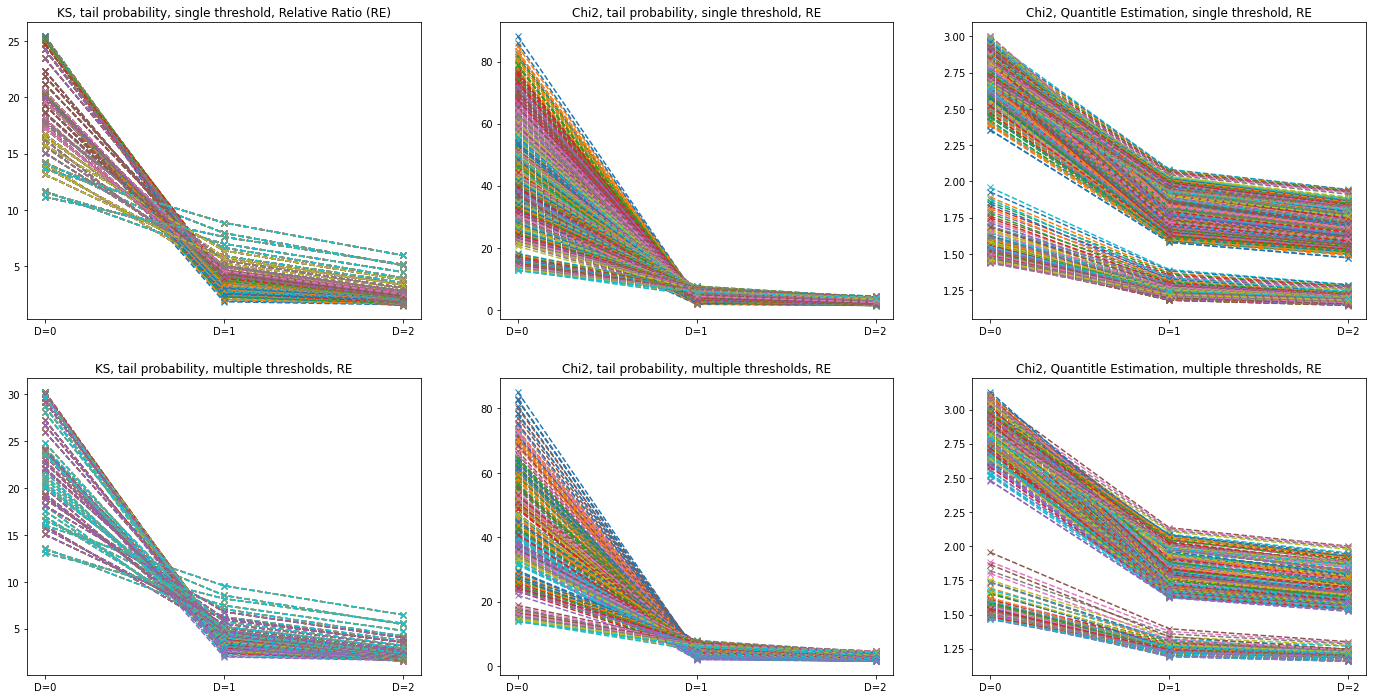

In [164]:
fig, axs = plt.subplots(2, 3,figsize=(24,12))
ks1= []
chi1 = []
for key, eachDF in go1:
#     print("KS: "+ key[0]+"with datasize={:}, percentageLHS={:} and thresholdPercentage={:}".format(key[1],key[2],key[3]))
    ks1.append((eachDF.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)']]/eachDF['trueValue'].unique()).tolist())
#     print("CHI2: "+ key[0]+"with datasize={:}, percentageLHS={:} and thresholdPercentage={:}".format(key[1],key[2],key[3])) 
    chi1.append((eachDF.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDF['trueValue'].unique()).tolist())
axs[0][0].plot(pd.DataFrame(data=ks1,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[0][0].set_title("KS, tail probability, single threshold, Relative Ratio (RE)")
axs[0][1].plot(pd.DataFrame(data=chi1,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[0][1].set_title("Chi2, tail probability, single threshold, RE")

ks2= []
chi2 = []
for key, eachDF in go2:
#     print("KS: "+ key[0]+"with datasize={:}, percentageLHS={:} and thresholdPercentage={:}".format(key[1],key[2],key[3]))
    ks2.append((eachDF.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)']]/eachDF['trueValue'].unique()).tolist())
#     print("CHI2: "+ key[0]+"with datasize={:}, percentageLHS={:} and thresholdPercentage={:}".format(key[1],key[2],key[3]))    
    chi2.append((eachDF.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDF['trueValue'].unique()).tolist())
axs[1][0].plot(pd.DataFrame(data=ks2,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[1][0].set_title("KS, tail probability, multiple thresholds, RE")
axs[1][1].plot(pd.DataFrame(data=chi2,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[1][1].set_title("Chi2, tail probability, multiple thresholds, RE")

for i in range(2):
    for j in range(3):
        axs[i][j].set_xticks([0, 1, 2])     
        axs[i][j].set_xticklabels(['D=0', 'D=1', 'D=2'])

chi3 = []      
chi4 = []      
for key, eachDF in go3:
#     print("CHI2: "+ key[0]+"with datasize={:}, percentageLHS={:} and thresholdPercentage={:}".format(key[1],key[2],key[3]))    
    chi3.append((eachDF.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDF['trueValue'].unique()).tolist())
for key, eachDF in go4:
#     print("CHI2: "+ key[0]+"with datasize={:}, percentageLHS={:} and thresholdPercentage={:}".format(key[1],key[2],key[3]))    
    chi4.append((eachDF.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDF['trueValue'].unique()).tolist())
axs[0][2].plot(pd.DataFrame(data=chi3,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[0][2].set_title("Chi2, Quantitle Estimation, single threshold, RE")
axs[1][2].plot(pd.DataFrame(data=chi4,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
_=axs[1][2].set_title("Chi2, Quantitle Estimation, multiple thresholds, RE")


### 5.2 Selection of shape constraints. i.e.  KS vs Chi2

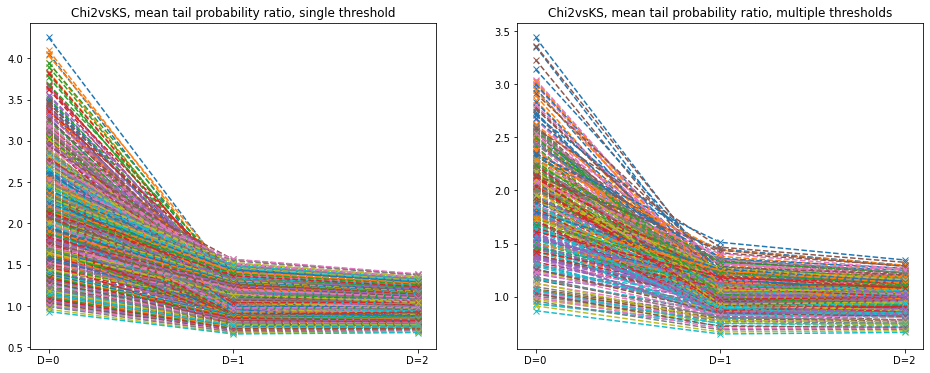

In [166]:
fig, axs = plt.subplots(1, 2,figsize=(16,6))
ksvschi1= []
for key, eachDF in go1:
    eachDF_mean = eachDF.mean(axis=0)
    ksvschi1.append([eachDF_mean['(0,CHI2)']/eachDF_mean['(0,KS)'],eachDF_mean['(1,CHI2)']/eachDF_mean['(1,KS)'],eachDF_mean['(2,CHI2)']/eachDF_mean['(2,KS)']])
    del eachDF_mean
ksvschi2= []    
for key, eachDF in go2:
    eachDF_mean = eachDF.mean(axis=0)
    ksvschi2.append([eachDF_mean['(0,CHI2)']/eachDF_mean['(0,KS)'],eachDF_mean['(1,CHI2)']/eachDF_mean['(1,KS)'],eachDF_mean['(2,CHI2)']/eachDF_mean['(2,KS)']])
    del eachDF_mean

axs[0].plot(pd.DataFrame(data=ksvschi1,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[0].set_title("Chi2vsKS, mean tail probability ratio, single threshold")
axs[1].plot(pd.DataFrame(data=ksvschi2,columns=["D=0","D=1","D=2"]).transpose().values.tolist(),'--x')
axs[1].set_title("Chi2vsKS, mean tail probability ratio, multiple thresholds")
for i in range(2):
        axs[i].set_xticks([0, 1, 2])     
        axs[i].set_xticklabels(['D=0', 'D=1', 'D=2'])

### 5.3 Selection of Threshold

In [167]:
go1 = cumDf1.groupby(by=['dataDistribution','dataSize','percentageLHS'])
go2 = cumDf2.groupby(by=['dataDistribution','dataSize','percentageLHS'])
go3 = cumDf3.groupby(by=['dataDistribution','dataSize','quantitleValue'])
go4 = cumDf4.groupby(by=['dataDistribution','dataSize','quantitleValue'])

In [212]:
for key, eachDF in go1:
    resultPerthreshold = []
    for thresholdPercentage, eachDFwThreshold in eachDF.groupby(by='thresholdPercentage'):
        
        eachDF_mean = eachDFwThreshold.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwThreshold['trueValue'][0]
        resultPerthreshold.append([thresholdPercentage]+list(eachDF_mean))
        del eachDF_mean
    display(pd.DataFrame(resultPerthreshold,columns=['thresholdPercentage','(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
    break
for key, eachDF in go2:
    resultPerthreshold = []
    for thresholdPercentage, eachDFwThreshold in eachDF.groupby(by='thresholdPercentage'):
        
        eachDF_mean = eachDFwThreshold.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwThreshold['trueValue'][0]
        resultPerthreshold.append([thresholdPercentage]+list(eachDF_mean))
        del eachDF_mean
    display(pd.DataFrame(resultPerthreshold,columns=['thresholdPercentage','(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
    break        
for key, eachDF in go3:
    resultPerthreshold = []
    for thresholdPercentage, eachDFwThreshold in eachDF.groupby(by='thresholdPercentage'):
        
        eachDF_mean = eachDFwThreshold.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwThreshold['trueValue'][0]
        resultPerthreshold.append([thresholdPercentage]+list(eachDF_mean))
        del eachDF_mean
    display(pd.DataFrame(resultPerthreshold,columns=['thresholdPercentage','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
    break
for key, eachDF in go4:
    resultPerthreshold = []
    for thresholdPercentage, eachDFwThreshold in eachDF.groupby(by='thresholdPercentage'):
        
        eachDF_mean = eachDFwThreshold.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwThreshold['trueValue'][0]
        resultPerthreshold.append([thresholdPercentage]+list(eachDF_mean))
        del eachDF_mean
    display(pd.DataFrame(resultPerthreshold,columns=['thresholdPercentage','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
    break            

,thresholdPercentage,"(0,KS)","(1,KS)","(2,KS)","(0,CHI2)","(1,CHI2)","(2,CHI2)"
0,0.600,25.294407,2.717356,1.515284,73.067762,2.695804,1.538771
1,0.625,25.294407,2.722565,1.527557,72.331016,2.664024,1.541291
2,0.650,25.294407,2.723549,1.539918,71.775252,2.577397,1.522333
3,0.675,25.294407,2.715161,1.556837,70.921902,2.569057,1.536478
4,0.700,25.294407,2.695030,1.578708,68.662589,2.530367,1.537723
5,0.725,25.294407,2.671917,1.603977,65.268107,2.496597,1.533589
6,0.750,25.294407,2.604434,1.626346,60.269938,2.404286,1.514849
7,0.775,25.294407,2.434581,1.638337,54.202681,2.357752,1.512236
8,0.800,25.294408,2.234662,1.631779,46.594237,2.220559,1.517336
9,0.825,25.294407,2.062048,1.630649,38.799075,2.062045,1.539358


,thresholdPercentage,"(0,KS)","(1,KS)","(2,KS)","(0,CHI2)","(1,CHI2)","(2,CHI2)"
0,0.60,30.115817,2.819733,1.546725,74.916212,2.652665,1.547198
1,0.65,30.115816,2.800810,1.575375,72.360342,2.553655,1.535857
2,0.70,30.115816,2.738475,1.619502,64.694638,2.484103,1.539661
3,0.75,30.115816,2.407254,1.661892,51.728104,2.320319,1.516773
4,0.80,30.115816,2.034219,1.644600,35.111438,2.034217,1.529986


,thresholdPercentage,"(0,CHI2)","(1,CHI2)","(2,CHI2)"
0,0.600,1.560310,1.254806,1.192994
1,0.625,1.555844,1.248815,1.189355
2,0.650,1.551393,1.244883,1.187821
3,0.675,1.547801,1.235839,1.182758
4,0.700,1.544604,1.228582,1.179401
5,0.725,1.542298,1.222583,1.176500
6,0.750,1.540398,1.218556,1.175368
7,0.775,1.539097,1.214775,1.174559
8,0.800,1.532965,1.211661,1.174276
9,0.825,1.524297,1.210142,1.174274


,thresholdPercentage,"(0,CHI2)","(1,CHI2)","(2,CHI2)"
0,0.60,1.581931,1.261723,1.203287
1,0.65,1.574350,1.247536,1.196079
2,0.70,1.569380,1.233983,1.188935
3,0.75,1.564843,1.226457,1.187489
4,0.80,1.548180,1.222795,1.186960


### 5.4 Selection of objective functions

In [234]:
go1 = cumDf1.groupby(by=['dataDistribution','dataSize','thresholdPercentage'])
go2 = cumDf2.groupby(by=['dataDistribution','dataSize','thresholdPercentage'])
go3 = cumDf3.groupby(by=['dataDistribution','dataSize','thresholdPercentage'])
go4 = cumDf4.groupby(by=['dataDistribution','dataSize','thresholdPercentage'])

In [235]:
for key, eachDF in go1:
    resultPercentage = []
    for percentage, eachDFwP in eachDF.groupby(by='percentageLHS'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'][0]
        resultPercentage.append([percentage]+list(eachDF_mean))
        del eachDF_mean
    display(pd.DataFrame(resultPercentage,columns=['ObjectiveLHS','(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
    break
for key, eachDF in go2:
    resultPercentage = []
    for percentage, eachDFwP in eachDF.groupby(by='percentageLHS'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'][0]
        resultPercentage.append([percentage]+list(eachDF_mean))
        del eachDF_mean
    display(pd.DataFrame(resultPercentage,columns=['ObjectiveLHS','(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
    break
for key, eachDF in go3:
    resultPercentage = []
    for percentage, eachDFwP in eachDF.groupby(by='quantitleValue'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'][0]
        resultPercentage.append([percentage]+list(eachDF_mean))
        del eachDF_mean
    display(pd.DataFrame(resultPercentage,columns=['targetQuantile','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
    break
for key, eachDF in go4:
    resultPercentage = []
    for percentage, eachDFwP in eachDF.groupby(by='quantitleValue'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'][0]
        resultPercentage.append([percentage]+list(eachDF_mean))
        del eachDF_mean
    display(pd.DataFrame(resultPercentage,columns=['targetQuantile','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
    break            

,ObjectiveLHS,"(0,KS)","(1,KS)","(2,KS)","(0,CHI2)","(1,CHI2)","(2,CHI2)"
0,0.90,25.294407,2.717356,1.515284,73.067762,2.695804,1.538771
1,0.91,25.454407,2.865946,1.555602,68.368621,2.874330,1.595334
2,0.92,25.214407,3.021834,1.608673,63.820556,3.088622,1.660844
3,0.93,24.810246,3.194161,1.677953,59.383276,3.346553,1.737088
4,0.94,24.260807,3.407353,1.767665,55.009818,3.655191,1.826247
5,0.95,22.361925,3.600809,1.874962,49.737134,4.000935,1.931322
6,0.96,20.547206,3.795748,2.008432,42.738393,4.347139,2.055771
7,0.97,18.587206,4.134141,2.214735,35.141036,4.655390,2.215334
8,0.98,16.707205,4.771857,2.635869,26.503923,5.154622,2.488431
9,0.99,14.227204,6.637628,3.952160,17.011630,5.648616,3.075339


,ObjectiveLHS,"(0,KS)","(1,KS)","(2,KS)","(0,CHI2)","(1,CHI2)","(2,CHI2)"
0,0.90,30.115817,2.819733,1.546725,74.916212,2.652665,1.547198
1,0.91,30.260026,2.984159,1.588874,69.685821,2.825709,1.605172
2,0.92,29.612653,3.134881,1.644733,64.637444,3.034823,1.672938
3,0.93,28.716863,3.305218,1.718078,59.774147,3.290208,1.752842
4,0.94,27.277909,3.501965,1.814133,55.040764,3.602725,1.847873
5,0.95,24.837908,3.709873,1.934487,50.342483,3.975865,1.962305
6,0.96,22.957908,3.930217,2.084874,44.121137,4.380650,2.101682
7,0.97,20.997908,4.314261,2.313981,36.428997,4.750350,2.276505
8,0.98,19.117908,5.026526,2.772717,27.869886,5.224573,2.554924
9,0.99,16.637908,7.092055,4.215504,17.842716,5.791437,3.189089


,targetQuantile,"(0,CHI2)","(1,CHI2)","(2,CHI2)"
0,0.90,1.560310,1.254806,1.192994
1,0.91,1.556927,1.258209,1.197219
2,0.92,1.555770,1.259840,1.201465
3,0.93,1.557705,1.259778,1.205320
4,0.94,1.564102,1.259397,1.208542
5,0.95,1.577284,1.259763,1.211010
6,0.96,1.601448,1.263049,1.213782
7,0.97,1.645684,1.273406,1.218809
8,0.98,1.733612,1.301471,1.233243
9,0.99,1.959219,1.392635,1.289422


,targetQuantile,"(0,CHI2)","(1,CHI2)","(2,CHI2)"
0,0.90,1.581931,1.261723,1.203287
1,0.91,1.577488,1.267217,1.208801
2,0.92,1.575164,1.270995,1.214405
3,0.93,1.575733,1.272697,1.219370
4,0.94,1.580549,1.272566,1.223477
5,0.95,1.591802,1.272821,1.226383
6,0.96,1.613611,1.275468,1.228888
7,0.97,1.654747,1.284495,1.233314
8,0.98,1.738043,1.310153,1.246889
9,0.99,1.954945,1.396260,1.301082


### 5.5 Selection of data source

In [250]:
go1 = cumDf1.groupby(by=['dataSize','thresholdPercentage','percentageLHS'])
go2 = cumDf2.groupby(by=['dataSize','thresholdPercentage','percentageLHS'])
go3 = cumDf3.groupby(by=['dataSize','thresholdPercentage','quantitleValue'])
go4 = cumDf4.groupby(by=['dataSize','thresholdPercentage','quantitleValue'])

In [251]:
for key, eachDF in go1:
    result = []
    for dataDistribution, eachDFwP in eachDF.groupby(by='dataDistribution'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'].values[0]
        result.append([dataDistribution]+list(eachDF_mean))
        del eachDF_mean
    display(pd.DataFrame(result,columns=['dataDistribution','(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
    break
for key, eachDF in go2:
    result = []
    for dataDistribution, eachDFwP in eachDF.groupby(by='dataDistribution'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'].values[0]
        result.append([dataDistribution]+list(eachDF_mean))
        del eachDF_mean
    display(pd.DataFrame(result,columns=['dataDistribution','(0,KS)','(1,KS)','(2,KS)','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
    break
for key, eachDF in go3:
    result = []
    for dataDistribution, eachDFwP in eachDF.groupby(by='dataDistribution'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'].values[0]
        result.append([dataDistribution]+list(eachDF_mean))
        del eachDF_mean
    display(pd.DataFrame(result,columns=['dataDistribution','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
    break
for key, eachDF in go4:
    result = []
    for dataDistribution, eachDFwP in eachDF.groupby(by='dataDistribution'):
        eachDF_mean = eachDFwP.mean(axis=0)[['(0,CHI2)','(1,CHI2)','(2,CHI2)']]/eachDFwP['trueValue'].values[0]
        result.append([dataDistribution]+list(eachDF_mean))
        del eachDF_mean
    display(pd.DataFrame(result,columns=['dataDistribution','(0,CHI2)','(1,CHI2)','(2,CHI2)']))
    break            

,dataDistribution,"(0,KS)","(1,KS)","(2,KS)","(0,CHI2)","(1,CHI2)","(2,CHI2)"
0,gamma,25.294407,2.717356,1.515284,73.067762,2.695804,1.538771
1,lognorm,25.454407,3.398972,1.939700,83.229283,3.765554,2.045978
2,pareto,25.254407,3.589998,2.060884,88.225082,4.313671,2.277567


,dataDistribution,"(0,KS)","(1,KS)","(2,KS)","(0,CHI2)","(1,CHI2)","(2,CHI2)"
0,gamma,30.115817,2.819733,1.546725,74.916212,2.652665,1.547198
1,lognorm,30.275817,3.581017,1.989494,82.793111,3.666029,2.031787
2,pareto,30.075817,3.810055,2.121195,85.182979,4.150448,2.240501


,dataDistribution,"(0,CHI2)","(1,CHI2)","(2,CHI2)"
0,gamma,1.560310,1.254806,1.192994
1,lognorm,2.748966,1.699887,1.566819
2,pareto,2.829046,1.697170,1.579223


,dataDistribution,"(0,CHI2)","(1,CHI2)","(2,CHI2)"
0,gamma,1.581931,1.261723,1.203287
1,lognorm,2.823020,1.717672,1.593686
2,pareto,2.912345,1.727631,1.615113
